In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'overseas-trade-indexes-december-2024-quarter-provisional.csv'
df_original = pd.read_csv(data_path)
df=df_original.copy()


print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105749 entries, 0 to 105748
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Series_reference  105749 non-null  object 
 1   Period            105749 non-null  float64
 2   Data_value        104790 non-null  float64
 3   STATUS            105749 non-null  object 
 4   UNITS             105749 non-null  object 
 5   MAGNTUDE          105749 non-null  int64  
 6   Subject           105749 non-null  object 
 7   Group             105749 non-null  object 
 8   Series_title_1    105749 non-null  object 
 9   Series_title_2    103609 non-null  object 
 10  Series_title_3    102864 non-null  object 
 11  Series_title_4    18647 non-null   object 
 12  Series_title_5    278 non-null     object 
dtypes: float64(2), int64(1), object(10)
memory usage: 10.5+ MB
None

First 5 rows:
  Series_reference   Period  Data_value STATUS  UNITS  MAGNTUDE  \
0   

C:\Users\jangi\AppData\Local\Temp\ipykernel_9232\463983000.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(data_path)


In [30]:
df.dropna(inplace=True)


df.fillna(df.select_dtypes(include=[np.number]).mean(numeric_only=True), inplace=True)

# Identify and remove duplicate records
df.drop_duplicates(inplace=True)

In [31]:
# Detect and treat outliers
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [32]:
# Standardize numerical values
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean(numeric_only=True)) / df[numerical_cols].std(numeric_only=True)

# Standardize categorical values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()


In [33]:
print(df.info()) 
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 38640 to 57215
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  268 non-null    object 
 1   Period            268 non-null    float64
 2   Data_value        268 non-null    float64
 3   STATUS            268 non-null    object 
 4   UNITS             268 non-null    object 
 5   MAGNTUDE          0 non-null      float64
 6   Subject           268 non-null    object 
 7   Group             268 non-null    object 
 8   Series_title_1    268 non-null    object 
 9   Series_title_2    268 non-null    object 
 10  Series_title_3    268 non-null    object 
 11  Series_title_4    268 non-null    object 
 12  Series_title_5    268 non-null    object 
dtypes: float64(3), object(10)
memory usage: 29.3+ KB
None
      Series_reference    Period  Data_value   STATUS    UNITS  MAGNTUDE  \
38640  otvq.ses2e91spc -1.748206    0.686684  revised 

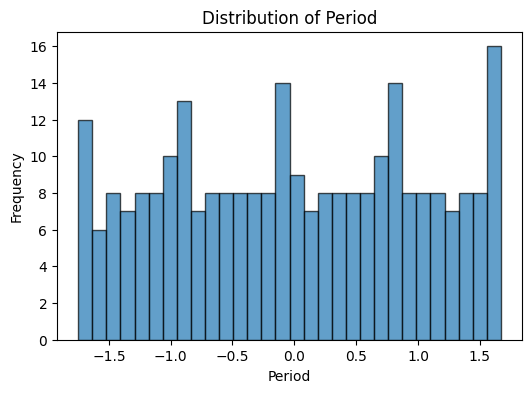

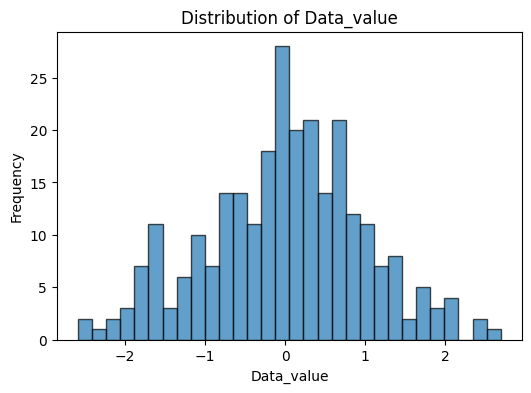

In [34]:
# Exploratory Data Analysis (EDA)
# Visualizing distribution of numerical variables
for col in numerical_cols:
    if df[col].isnull().all():
        continue  # Skip columns with all NaN values
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

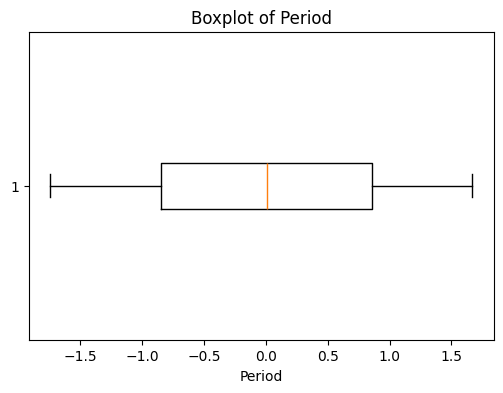

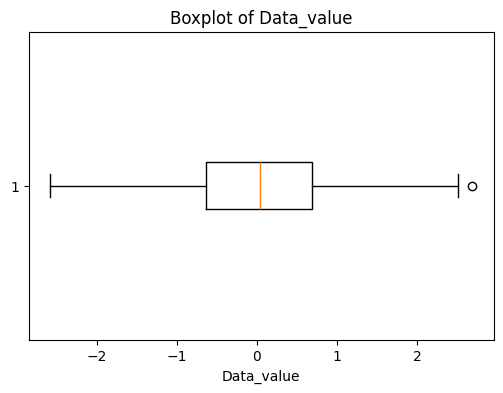

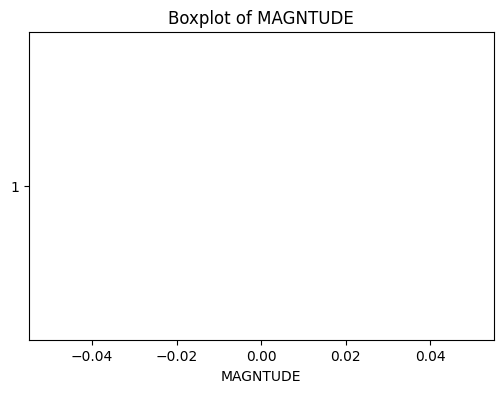

In [35]:
# Boxplots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

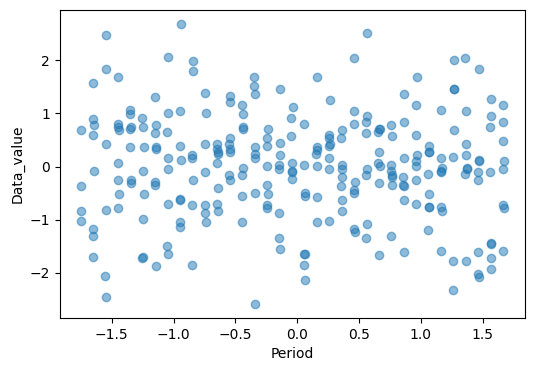

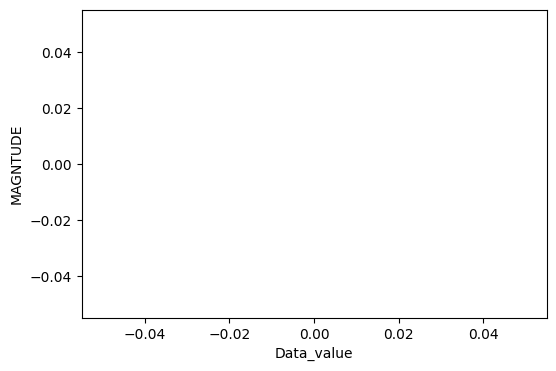

In [36]:
# Scatter plots for numerical relationships
if len(numerical_cols) > 1:
    for i in range(len(numerical_cols) - 1):
        plt.figure(figsize=(6, 4))
        plt.scatter(df[numerical_cols[i]], df[numerical_cols[i + 1]], alpha=0.5)
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[i + 1])
        plt.show()

In [37]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Period  Data_value  MAGNTUDE
Period      1.000000   -0.059496       NaN
Data_value -0.059496    1.000000       NaN
MAGNTUDE         NaN         NaN       NaN


In [38]:
# Feature Engineering
# Encoding categorical variables manually
unique_values = {col: {val: idx for idx, val in enumerate(df[col].unique())} for col in categorical_cols}
for col in categorical_cols:
    df[col] = df[col].map(unique_values[col])


In [39]:
# Splitting data into train and test sets
# Assuming first numerical column as target variable
target_column = numerical_cols[0]
X = df.drop(columns=[target_column]).values
y = df[target_column].values
split_idx = int(0.8 * len(df))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [45]:
# Applying a simple Linear Regression model manually with Ridge Regression Regularization
lambda_val = 1e-5  # Small regularization parameter

# Add bias term to training and testing data
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Compute theta using the regularized normal equation
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b) + lambda_val * np.eye(X_train_b.shape[1])).dot(X_train_b.T).dot(y_train)
y_pred = X_test_b.dot(theta_best)


In [47]:
# Model evaluation with checks for NaN values
mse = np.mean((y_test - y_pred) ** 2)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Check if computed metrics are NaN
if np.isnan(mse) or np.isnan(r2):
    print("Model performance metrics are NaN. This might be due to issues in the data (e.g., constant target variable or insufficient variance) or errors in data processing/model computation.")
    # Optionally, you can print more diagnostics:
    print("y_test:", y_test)
    print("y_pred:", y_pred)
else:
    print(f'Model Performance:\nMean Squared Error: {mse:.4f}\nR-Squared: {r2:.4f}')


Model performance metrics are NaN. This might be due to issues in the data (e.g., constant target variable or insufficient variance) or errors in data processing/model computation.
y_test: [0.35871519 0.36172938 0.36474357 0.45617409 0.45918828 0.46220247
 0.46521667 0.55664718 0.55966137 0.56267557 0.56568976 0.65712027
 0.66013447 0.66314866 0.66616285 0.75759337 0.76060756 0.76362175
 0.76663595 0.85806646 0.86108065 0.86409485 0.86710904 0.95853955
 0.96155375 0.96456794 0.96758213 1.05901265 1.06202684 1.06504103
 1.06805523 1.15948574 1.16249993 1.16551413 1.16852832 1.25995883
 1.26598722 1.26900141 1.36043193 1.36344612 1.36646031 1.36947451
 1.46090502 1.46391921 1.46693341 1.4699476  1.56137811 1.56439231
 1.5674065  1.57042069 1.66185121 1.6648654  1.66787959 1.67089379]
y_pred: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan 